In [63]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error # metricas
from sklearn.model_selection import GridSearchCV #cross validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold

# ALGORITMOS
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


In [4]:
dados = pd.read_csv('insurance.csv')

dados obtidos no Keggle: https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv

COLUNAS
- age: idade do beneficiário principal

- sex: sexo do contratante do seguro, feminino, masculino

- bmi: índice de massa corporal, fornecendo uma compreensão do corpo, pesos relativamente altos ou baixos em relação à altura,
índice objetivo de peso corporal (kg / m ^ 2) usando a relação entre altura e peso, idealmente 18,5 a 24,9

- children: Número de filhos cobertos pelo seguro saúde / Número de dependentes

- smoker: fumante

- region: a área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste, noroeste.

- charges: custos médicos individuais faturados pelo seguro de saúde

In [13]:
dados

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Análise exploratória dos dados

In [20]:
dados.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [9]:
# verificar dados faltantes
dados.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
# tipos das variáveis
dados.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

In [17]:
# Coluna Smoker
# YES => 1
# NO  => 0
dados.smoker.replace(['yes', 'no'], [1, 0], inplace=True)

# Coluna Sex
# female => 1
# male  => 0
dados.sex.replace(['female', 'male'], [1, 0], inplace=True)

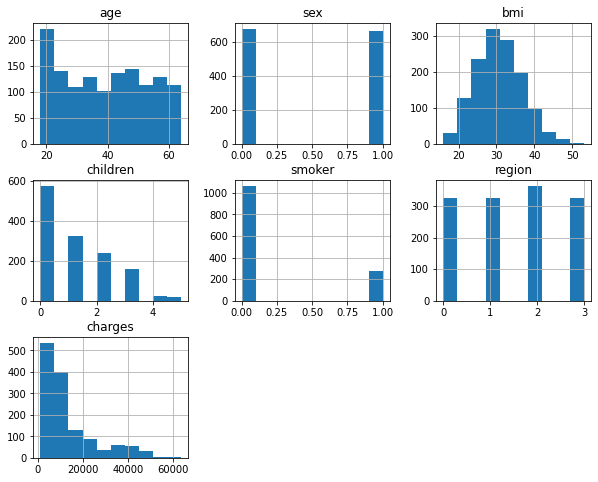

In [62]:
# ver histograma das variáveis numéricas
dados.hist(figsize=(10,8));

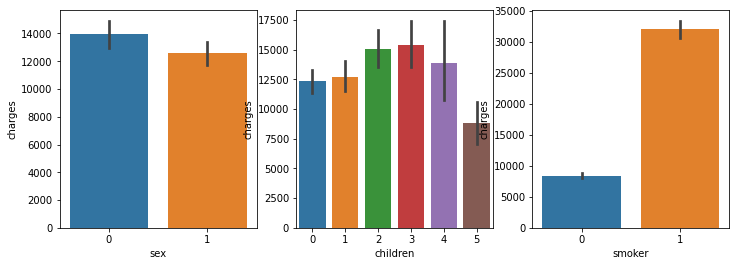

In [22]:
# Plotar os gráficos para Charges vs. Sex, children e Smoker
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='sex', y='charges', data=dados, ax=axis1)
sns.barplot(x='children', y='charges', data=dados, ax=axis2)
sns.barplot(x='smoker', y='charges', data=dados, ax=axis3);

 - nota-se que pessoas que fumam tendem a pagar mais caro no plano de saúde

<AxesSubplot:>

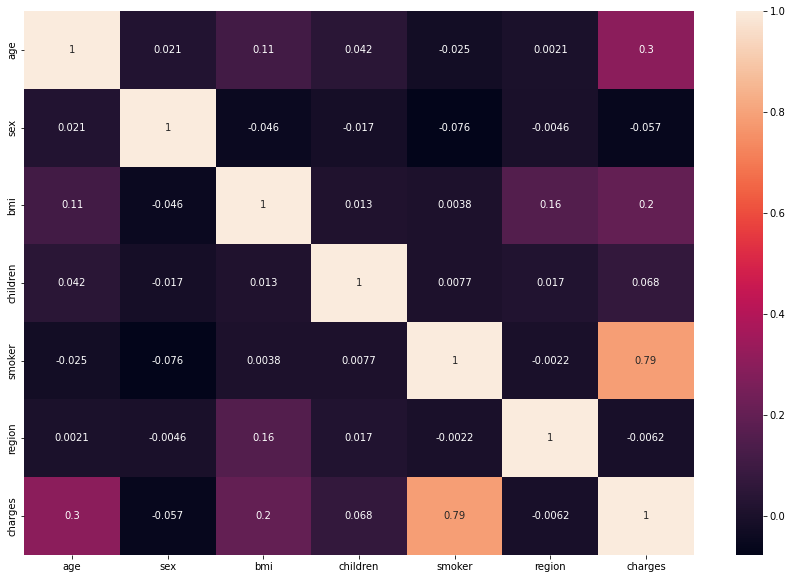

In [33]:
#Correlação entre as variáveis
figura = plt.figure(figsize=(15,10))
sns.heatmap(dados.corr(), annot=True)

- as variáveis que mais explicam a variável 'charges' são 'smoker' e 'children'

# Peparar dados para o Modelo

In [32]:
# TRATAMENTO DO ATRIBUTO CATEGÓRICOS
# transformando a variável country em número
from sklearn.preprocessing import LabelEncoder
label_enconder_country = LabelEncoder()

dados.iloc[:,5] = label_enconder_country.fit_transform(dados.iloc[:,5]) 

In [66]:
# Divisão da Variáveis
X_dados = dados.iloc[:,0:6].values 
Y_dados = dados.iloc[:,6].values

# Treino e teste
X_dados_train, X_dados_test, Y_dados_train, Y_dados_test = train_test_split(X_dados, Y_dados, test_size=0.3, random_state=0)

# ESCALONAMENTO DOS DADOS 
scaler_x = StandardScaler()
X_dados_train_scaled    = scaler_x.fit_transform(X_dados_train)
X_dados_test_scaled     = scaler_x.transform(X_dados_test)
X_dados_scaled          = scaler_x.transform(X_dados)

scaler_y = StandardScaler()
Y_dados_train_scaled    = scaler_y.fit_transform(Y_dados_train.reshape(-1,1))
Y_dados_test_scaled     = scaler_y.transform(Y_dados_test.reshape(-1,1))
Y_dados_scaled          = scaler_y.transform(Y_dados.reshape(-1,1))


In [67]:
X_dados_train.shape, X_dados_test.shape, Y_dados_train.shape, Y_dados_test.shape

((936, 6), (402, 6), (936,), (402,))

# Teste de Algoritmos e Avaliação

In [85]:
# ALGORITMO - REDE NEURAL
# para a Rede Neural os dados precisam estar escalonados
# hidden_layer_sizes => (6 + 1 ) / 2  / 4 = numero de atributos, 1 = neuronio de saída

regressor_neural = MLPRegressor(max_iter=1500, hidden_layer_sizes=(4,4), activation='logistic')
regressor_neural.fit(X_dados_train_scaled, Y_dados_train_scaled.ravel())

score = regressor_neural.score(X_dados_test_scaled, Y_dados_test_scaled.ravel())
previsoes = regressor_neural.predict(X_dados_test_scaled)


# INVERSE
Y_dados_test_inverse = scaler_y.inverse_transform(Y_dados_test_scaled)
previsoes_inverse = scaler_y.inverse_transform(previsoes.reshape(-1,1))
#MAE
mae = mean_absolute_error(Y_dados_test_inverse, previsoes_inverse)
#MSE
mse = mean_squared_error(Y_dados_test_inverse, previsoes_inverse)
#RMSE
rmse = np.sqrt(mean_squared_error(Y_dados_test_inverse, previsoes_inverse))

print(f"Score: {score} - MAE: {mae} - MSE: {mse} - RMSE: {rmse}")

Score: 0.869019333523133 - MAE: 2766.6761932474965 - MSE: 20887416.82276461 - RMSE: 4570.275355245525


In [74]:
# ALGORITMO - SVM
# para o SVM os dados precisam estar escalonados

regressor_svm= SVR(kernel='rbf')
regressor_svm.fit(X_dados_train_scaled,Y_dados_train_scaled.ravel())


score2 = regressor_svm.score(X_dados_test_scaled, Y_dados_test_scaled.ravel())
previsoes2 = regressor_svm.predict(X_dados_test_scaled)


# INVERSE
Y_dados_test_inverse = scaler_y.inverse_transform(Y_dados_test_scaled)
previsoes2_inverse = scaler_y.inverse_transform(previsoes2.reshape(-1,1))
#MAE
mae = mean_absolute_error(Y_dados_test_inverse, previsoes2_inverse)
#MSE
mse = mean_squared_error(Y_dados_test_inverse, previsoes2_inverse)
#RMSE
rmse = np.sqrt(mean_squared_error(Y_dados_test_inverse, previsoes2_inverse))

print(f"Score: {score2} - MAE: {mae} - MSE: {mse} - RMSE: {rmse}")

Score: 0.877917969449256 - MAE: 2449.2570769616527 - MSE: 19468356.111420713 - RMSE: 4412.296013576232


In [81]:
# ALGORITMO - RANDOM FOREST 
# para o Forest os dados não precisam estar escalonados
regressor_forest= RandomForestRegressor(n_estimators=100)
regressor_forest.fit(X_dados_train,Y_dados_train)

score3 = regressor_forest.score(X_dados_test,Y_dados_test)
previsoes3 = regressor_forest.predict(X_dados_test)


#MAE
mae = mean_absolute_error(Y_dados_test, previsoes3)
#MSE
mse = mean_squared_error(Y_dados_test, previsoes3)
#RMSE
rmse = np.sqrt(mean_squared_error(Y_dados_test, previsoes3))
print(f"Score: {score3} - MAE: {mae} - MSE: {mse} - RMSE: {rmse}")

Score: 0.8619649653419693 - MAE: 2796.8230562004974 - MSE: 22012373.14330094 - RMSE: 4691.734555929283


- Até o momento a performance dos 3 algoritmos se assemelham bastante, com percentual de Score variando entre 86% e 87% e o Mean Absolute Error em $2.400 e $2.700

# Tuning dos Parâmetros

In [ ]:
# REDE NEURAL
parametros = { 
    'activation' :   ['relu', 'logistic','than','identity'],
    'solver' : ['adam','sgd','lbfgs'],
    'batch_size' : [10,56],
    'max_iter' : [500,1000,1500],
    'hidden_layer_sizes' : [(2,2),(4,4)]
}

grid_search = GridSearchCV(estimator=MLPRegressor(), param_grid=parametros)
grid_search.fit(X_dados_scaled,Y_dados_scaled.ravel())

melhores_parametros = grid_search.best_params_
melhor_resultado    = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

In [86]:
# SVM
# criar um dicionario com os mesmo nomes e opções utilizados no algoritmo
parametros = { 
    'tol' :   [0.001, 0.0001, 0.00001],
    'C' : [1.0,1.5,2.0],
    'kernel' : ['rbf', 'linear', 'poly','sigmoid'],
    'degree': [1,2,3,4,5] 
}

grid_search = GridSearchCV(estimator=SVR(), param_grid=parametros)
grid_search.fit(X_dados_scaled,Y_dados_scaled.ravel())

melhores_parametros = grid_search.best_params_
melhor_resultado    = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 2.0, 'degree': 1, 'kernel': 'rbf', 'tol': 0.001}
0.8412395678923776


In [87]:
# RANDOM FOREST
# criar um dicionario com os mesmo nomes e opções utilizados no algoritmo
parametros = { 
    'criterion' :   ['squared_error', 'absolute_error', 'poisson'],
    'n_estimators' : [10,40,100,150],
    'min_samples_split' :   [2,5,10],
    'min_samples_leaf'  :   [1,5,10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parametros)
grid_search.fit(X_dados,Y_dados)

melhores_parametros = grid_search.best_params_
melhor_resultado    = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'squared_error', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}
0.8603141777557723


# Construção do Modelo e Avaliação

In [88]:
resultados_randomf          = []
resultados_svm              = []
resultados_redeneural       = []

# faz 30 teste a cada K do cross validation => K=10 => 10*30 = 300 testes para cada algoritmo
# salva a média de cada teste de cada algoritmo mas respectivas variáveis

for i in range(30):
    # n_splits      => k vezes a separar os dados
    # shuffle=True  => sempre misturar os dados
    kfold = KFold(n_splits=10, shuffle=True, random_state=i) 
    
    #instaciar os algoritmos com os melhores parametros encontrados

    randoforest = RandomForestRegressor(criterion='squared_error', min_samples_leaf= 10, min_samples_split=  10, n_estimators=100)
    scores2 = cross_val_score(randoforest, X_dados,Y_dados, cv=kfold)
    resultados_randomf.append(scores2.mean())

    svm = SVR(C=2.0, kernel= 'rbf', tol=0.001, degree=1)
    scores5 = cross_val_score(svm, X_dados_scaled,Y_dados_scaled.ravel(), cv=kfold)
    resultados_svm.append(scores5.mean())
    
   
    redeneural = MLPRegressor(activation='logistic', batch_size=56,  max_iter=1500, hidden_layer_sizes=(4,4) )
    scores6 = cross_val_score(redeneural, X_dados_scaled,Y_dados_scaled.ravel(), cv=kfold)
    resultados_redeneural.append(scores6.mean())

In [89]:
resultados = pd.DataFrame({
    'random forest': resultados_randomf,'svm': resultados_svm, 'redeneural':resultados_redeneural
})

In [93]:
# média do Score obtido através do Cross Validation
resultados.mean()

random forest    0.857432
svm              0.842525
redeneural       0.837794
dtype: float64

In [94]:
# Coef. de Variação
(resultados.std() / resultados.mean()) * 100

random forest    0.270176
svm              0.266972
redeneural       0.366504
dtype: float64

- após a validação cruzada, os 3 algoritmos ainda se mantiveram com performance semelhantes. *A rede neural apresentou um coeficiente de variação um pouco mais elevado que os demais, 
mesmo assim serão utilizados os 3 algoritmos para realizarmos as previsões, utilizando a técnica de combinação de Regressores

# Combinação de Regressores e Previsões

In [109]:
# Treinamento final
randoforest = RandomForestRegressor(criterion='squared_error', min_samples_leaf= 10, min_samples_split=  10, n_estimators=100)
randoforest.fit(X_dados, Y_dados)

svm = SVR(C=2.0, kernel= 'rbf', tol=0.001, degree=1)
svm.fit(X_dados_scaled,Y_dados_scaled.ravel())

redeneural = MLPRegressor(activation='logistic', batch_size=56,  max_iter=1500, hidden_layer_sizes=(4,4) )
redeneural.fit(X_dados_scaled,Y_dados_scaled.ravel())

MLPRegressor(activation='logistic', batch_size=56, hidden_layer_sizes=(4, 4),
             max_iter=1500)

- Quanto eu pagaria de plano de saúde ?

In [ ]:
# novo registro
# age => 27 , sex => male, bmi => 24,000, children => 0, smoker => 0, region => southeast
regiao = label_enconder_country.transform(['southeast']);
novo = [[ 27, 0, 24.000 ,0, 0, regiao ]];
novo_scaled = scaler_x.transform(novo);


# previsões
prev_svm = svm.predict(novo_scaled);
prev_svm = scaler_y.inverse_transform(prev_svm.reshape(-1,1));

prev_random  = randoforest.predict(novo);

prev_redeneural  = redeneural.predict(novo_scaled);
prev_redeneural  = scaler_y.inverse_transform(prev_redeneural.reshape(-1,1));



In [132]:
#print das previsões
print(f"Random Forest: {prev_random} - SVM: {prev_svm} - Rede Neural: {prev_redeneural}")

Random Forest: [3455.59241189] - SVM: [[3569.80824073]] - Rede Neural: [[4160.85334743]]


In [134]:
media = (prev_random + prev_svm + prev_redeneural) / 3
media

array([[3728.75133335]])

- Utilizou-se a média dos 3 Regressores e resultou no valor do plano de Saúde de $3.728,75